<a href="https://colab.research.google.com/github/fitditcorp4/research/blob/main/weekly_dataset02022023_plus_qtr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports library
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
#from pandas import datetime
from datetime import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
# plt.style.use('fivethirtyeight')
plt.style.use('classic')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

In [3]:
from google.colab import data_table
data_table.enable_dataframe_formatter

<function google.colab.data_table.enable_dataframe_formatter()>

In [4]:
df0 = pd.read_json('https://oilspillmonitor.ng/api/spill-data.php?dataset=nosdra&format=json')

In [5]:
 df0

,id,status,company,incidentnumber,incidentdate,contaminant,estimatedquantity,sitelocationname,spillareahabitat,lastupdatedby,cause,updatefor,latitude,longitude,statesaffected,attachments,jivdate,lga,zonaloffice,certificatedate,certificatenumber,formadate,reportdate,spillstopdate,initialcontainmentmeasures,descriptionofimpact,formbdate,formcdate,jivpresent,typeoffacility,cleanupcompleteddate,cleanupmethods,cleanupdate,quantityrecovered,postcleanupinspectiondate,finalsamplingdate,estimatedspillarea,remediationstart,remediationtype,remediationend,postimpactassessmentdate,finallabresultsdate
0,2,confirmed,ADDAX,HSE/OBO/0611/101,2006-11-23,cr,225,Subsea Pipeline @ Mimbo Platform (OML123),of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,confirmed,ADDAX,HSE/OBO/0612/108,2006-12-18,cr,0.5,EBNE04HT @ Ebughu Platform (OML 123),of,NOSDRA,eqf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,confirmed,ADDAX,HSE/OBO/0612/110,2006-12-27,cr,25,South East of BOGI Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,confirmed,ADDAX,HSE/OBO/0706/166,2007-05-14,cr,2,Adanga Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,confirmed,ADDAX,HSE/OBO/0708/201,2007-08-16,gs,NaN,"Izombe Well #10LS 4"" Flowline",la,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16443,236556,confirmed,SEPLAT,SEPLAT/EA/OBMS/01/2022,2022-08-23,ch,103,"UMUGUMA UMUAGWO,ASSA ROAD,OHAJI, OHAJI/EGBEMA ...",la,2023-02-10 AB008,other:,236556.0,5.3758806,6.7955500,IM,"[{""url"":""data/attachments/236556/WhatsApp Imag...",2022-08-24,Ohaji/Egbema,ph,NaN,NaN,NaN,2022-08-23,2022-08-23,other:NONE,The spill was due to an accident involving a t...,NaN,NaN,"mltry,plc,cmmnt,cmpny,dpr,mnstry,nosdra",tk,2022-09-16,Manual,2022-09-03,NaN,NaN,NaN,0.000495,NaN,NaN,NaN,NaN,NaN
16444,244137,invalid,PPMC,NPSC/KAD/HSE/OSNR/22/02,2022-09-14,cr,0.3,KM 264 WARRI - KADUNA BAKIN KASUWA KADUNA CHIKUN,la,2023-02-10 AB008,other: ACCIDENT,244137.0,10.27543,007.30240,NaN,"[{""url"":""data/attachments/t1835f25ac74/new doc...",2022-09-20,Chikun,kd,NaN,NaN,NaN,2022-09-14,2022-09-15,bw,Construction truck belonging to Brentex CPP ha...,NaN,NaN,"cmmnt,cmpny,mltry,mnstry,nosdra,plc",pl,NaN,NaN,NaN,NONE,NaN,NaN,0.00009,NaN,NaN,NaN,NaN,NaN
16445,268821,confirmed,SEPLAT,SEPLAT/WA/0S/02/2023,2023-01-18,cr,0.01,24'' AMUKPE - RAPELE TRUNKLINE AT EDJEKIMONI,ss,2023-02-13 WA003,sab,NaN,5.7814389,5.7067250,DE,"[{""url"":""data/attachments/t1864b39e37a/1.jpg"",...",2023-02-11,Sapele,wa,NaN,NaN,NaN,2023-01-18,NaN,other:none,The spill incident was withi the company's rig...,NaN,NaN,"nosdra,dpr,mnstry,cmpny,cmmnt",pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16446,268822,confirmed,SPDC,884190,2023-01-31,no,NaN,20'' OTUMARA - ESCRAVOS PIPELINE ROW (TEP),sw,2023-02-13 WA003,sab,NaN,5.6464444,5.1470222,DE,"[{""url"":""data/attachments/t1864b41c2f8/1.jpg"",...",2023-02-10,Warri-South-West,wa,NaN,NaN,NaN,2023-01-31,NaN,NaN,An illegal 4'' ball valve was installed on the...,NaN,NaN,"nosdra,dpr,mnstry,cmpny,cmmnt",pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = df0.loc[df0['status'].isin(['confirmed', 'reviewed'])]

In [7]:
#df1['incidentdate'].value_counts()

In [8]:
df1.replace(to_replace='20014-07-08', value='2014-07-08',inplace=True)  # Replaces a typograpical error
df1.replace(to_replace='2016-01-13 AB008', value='2016-01-13',inplace=True)
df1.replace(to_replace='2016-04-14 AB014', value='2016-01-13',inplace=True)
df1.replace(to_replace='2019-08-19 PH133', value='2019-08-19',inplace=True)
df1.replace(to_replace='2019-08-19 PH133, 2020-12-15 PH030, 2021-09-17 PH012, 2021-09-20 PH012, 2021-10-31 PH012', value='2019-08-19',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [9]:
df1.incidentdate.isna().sum()

590

In [10]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.reportdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.formadate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.jivdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.lastupdatedby

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [11]:
df1.incidentdate.isna().sum()

0

In [12]:
df1['contaminant'] = df1['contaminant'].fillna('notavailable')
df1.loc[df1['contaminant'].str.startswith('other'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('oth'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('re'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Die'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('not'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('Con'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('CON'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('co'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('NIL'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('LPFO'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Pro'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('sheen'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('Ass'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('gas'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('wa'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('F'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('0'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('gs'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('Crude'), 'contaminant'] = 'cr'
df1.loc[df1['contaminant'].str.startswith('crude'), 'contaminant'] = 'cr'

<ipython-input-12-25e6b16a420f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['contaminant'] = df1['contaminant'].fillna('notavailable')
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
df1.loc[df1['contaminant'].str.startswith('GAS'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('None'), 'contaminant'] = 'no'

In [14]:
df1.contaminant.unique()

array(['cr', 'ga', 'other', 'na', 'ch', 're', ' ', 'co', 'no',
       'Non-Leaking', 'Non leaking'], dtype=object)

In [15]:
df2 = df1.loc[df1['contaminant'].isin(['cr', 're', 'co', 'ch'])]

In [16]:
df2.estimatedquantity.isna().sum()

2340

In [17]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-17-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-17-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-17-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [18]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-18-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-18-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-18-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [19]:
df3 = df2.loc[(df2['incidentdate'] > '2005-12-31') & (df2['incidentdate'] <'2022-12-31')]

In [20]:
df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])

<ipython-input-20-3ce1f0b5bdb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])


In [21]:
df3.estimatedquantity = pd.to_numeric(df3.estimatedquantity, errors = 'coerce')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df3.columns

Index(['id', 'status', 'company', 'incidentnumber', 'incidentdate', 'contaminant', 'estimatedquantity', 'sitelocationname', 'spillareahabitat', 'lastupdatedby', 'cause', 'updatefor', 'latitude', 'longitude', 'statesaffected', 'attachments', 'jivdate', 'lga', 'zonaloffice', 'certificatedate', 'certificatenumber', 'formadate', 'reportdate', 'spillstopdate', 'initialcontainmentmeasures', 'descriptionofimpact', 'formbdate', 'formcdate', 'jivpresent', 'typeoffacility', 'cleanupcompleteddate', 'cleanupmethods', 'cleanupdate', 'quantityrecovered', 'postcleanupinspectiondate', 'finalsamplingdate', 'estimatedspillarea', 'remediationstart', 'remediationtype', 'remediationend', 'postimpactassessmentdate', 'finallabresultsdate'], dtype='object')

In [23]:
dfbi =  df3[['incidentdate','company','contaminant','estimatedquantity','spillareahabitat','cause']]
dfbii = df3.set_index('incidentdate')

In [24]:
from google.colab import files

In [25]:
dfbi.to_csv('dfbii.csv')

In [26]:
#files.download('dfbii.csv')

In [27]:
df3c = df3.copy()

In [28]:
df3c["cause"].unique()

array([nan, 'eqf', 'ome', 'other:', 'sab', 'cor', 'ytd', 'other: mys',
       'other:destruction of illegal refineries by JTF',
       'other:destruction of illegal refineries by JTF.', 'other:mys'],
      dtype=object)

In [29]:
df3c['cause'] = df3c['cause'].str.replace('other: mys', 'other')
df3c['cause'] = df3c['cause'].str.replace('other:destruction of illegal refineries by JTF', 'other')
df3c['cause'] = df3c['cause'].str.replace('other:destruction of illegal refineries by JTF.', 'other')
df3c['cause'] = df3c['cause'].str.replace('other:mys', 'other')
df3c['cause'] = df3c['cause'].str.replace('other:', 'other')
df3c['cause'] = df3c['cause'].str.replace('other.', 'other')

<ipython-input-29-8a06970486e2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df3c['cause'] = df3c['cause'].str.replace('other:destruction of illegal refineries by JTF.', 'other')
<ipython-input-29-8a06970486e2>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df3c['cause'] = df3c['cause'].str.replace('other.', 'other')


In [30]:
df3c["cause"].value_counts()

sab      7518
eqf      1398
cor       839
other     365
ome       305
ytd       240
Name: cause, dtype: int64

In [31]:
df3c['cause'].isna().sum()

726

In [32]:
len(df3c)

11391

In [33]:
df3cd = pd.get_dummies(df3c, columns=['cause'])

In [34]:
df3cd

,id,status,company,incidentnumber,incidentdate,contaminant,estimatedquantity,sitelocationname,spillareahabitat,lastupdatedby,updatefor,latitude,longitude,statesaffected,attachments,jivdate,lga,zonaloffice,certificatedate,certificatenumber,formadate,reportdate,spillstopdate,initialcontainmentmeasures,descriptionofimpact,formbdate,formcdate,jivpresent,typeoffacility,cleanupcompleteddate,cleanupmethods,cleanupdate,quantityrecovered,postcleanupinspectiondate,finalsamplingdate,estimatedspillarea,remediationstart,remediationtype,remediationend,postimpactassessmentdate,finallabresultsdate,cause_cor,cause_eqf,cause_ome,cause_other,cause_sab,cause_ytd
0,2,confirmed,ADDAX,HSE/OBO/0611/101,2006-11-23,cr,225.00000,Subsea Pipeline @ Mimbo Platform (OML123),of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,3,confirmed,ADDAX,HSE/OBO/0612/108,2006-12-18,cr,0.50000,EBNE04HT @ Ebughu Platform (OML 123),of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
2,4,confirmed,ADDAX,HSE/OBO/0612/110,2006-12-27,cr,25.00000,South East of BOGI Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,5,confirmed,ADDAX,HSE/OBO/0706/166,2007-05-14,cr,2.00000,Adanga Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
5,7,confirmed,ADDAX,HSE/OBO/0708/213,2007-08-30,cr,200.00000,"Moni Pulo 12"" Pipeline Offshore OML 123",of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16424,267306,confirmed,MPN,22/2022,2022-12-14,cr,0.01409,Ubit PP OML 67,of,2023-02-07 AB008,267306.0,4.2588889,8.1847222,AK,"[{""url"":""data/attachments/t1851620e425/NOSDRA_...",NaN,NaN,uy,NaN,NaN,2022-12-15,2022-12-15,NaN,other: Suspended blasting activities,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
16425,267659,confirmed,MPN,23/2022,2022-12-16,cr,0.00649,Inim PP OML 67,of,2023-02-07 AB008,267659.0,4.1888889,7.9305556,AK,"[{""url"":""data/attachments/t1853a55aaab/NOSDRA_...",NaN,NaN,uy,NaN,NaN,2022-12-17,2022-12-17,NaN,other:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
16426,244918,confirmed,MPN,18/2022,2022-10-18,cr,0.03145,Ubit PP OML 67,of,2023-02-07 AB008,244918.0,4.2588889,8.0180556,AK,"[{""url"":""data/attachments/t184351f52fd/NOSDRAF...",NaN,NaN,uy,NaN,NaN,2022-10-19,2022-10-19,2022-10-19,NaN,Gas bubbles release from test separator PSV\nr...,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
16430,244916,confirmed,MPN,16/2022,2022-10-12,re,0.00160,QIT/Ibeno,NaN,2023-02-07 AB008,244916.0,4.5415000,8.0080000,AK,"[{""url"":""data/attachments/t184350a9878/NOSDRAF...",NaN,Ibeno,uy,NaN,NaN,2022-10-13,2022-10-13,NaN,other:,NaN,2022-10-26,NaN,NaN,tf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0


In [35]:
df4w = df3.groupby([pd.Grouper(key='incidentdate', freq='W')])['estimatedquantity'].agg(['sum','size'])
df4m = df3.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
df4wx = df3cd.groupby([pd.Grouper(key='incidentdate', freq='W')])['cause_cor','cause_ome','cause_other','cause_sab','cause_ytd'].agg(['sum'])

<ipython-input-35-b5f3f48cdc3b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4wx = df3cd.groupby([pd.Grouper(key='incidentdate', freq='W')])['cause_cor','cause_ome','cause_other','cause_sab','cause_ytd'].agg(['sum'])


In [36]:
df4wx = df4wx.rename(columns={"cause_cor":"corrosion", 
                              "cause_ome":"ome",
                              "cause_other":"others",
                              "cause_sab":"sabotage",
                              "cause_ytd":"ytd"})

In [37]:
df4wx.columns

MultiIndex([('corrosion', 'sum'),
            (      'ome', 'sum'),
            (   'others', 'sum'),
            ( 'sabotage', 'sum'),
            (      'ytd', 'sum')],
           )

In [38]:
df4wx

,corrosion,ome,others,sabotage,ytd
,sum,sum,sum,sum,sum
incidentdate,,,,,
2006-01-08,1,0,0,1,0
2006-01-15,0,1,0,0,0
2006-01-22,0,1,0,1,0
2006-01-29,0,0,0,0,0
2006-02-05,0,0,0,3,0
2006-02-12,0,1,0,0,2
2006-02-19,0,0,0,1,0
2006-02-26,1,0,0,0,1


In [39]:
df4m.tail()

,sum,size
incidentdate,,
2022-08-31,966.269540,68
2022-09-30,493.283100,60
2022-10-31,538.790554,43
2022-11-30,1240.313000,19
2022-12-31,450.980580,16


In [40]:
df4w = df4w.rename(columns={'sum':'estimatedqty', 'size':'spillno'})
df4m = df4m.rename(columns={'sum':'estimatedqty', 'size':'spillno'})

In [41]:
!pip install h2o -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 5.8 MB/s eta 0:00:00


In [42]:
import h2o
from h2o.automl import H2OAutoML

In [43]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu1agxyep
  JVM stdout: /tmp/tmpu1agxyep/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu1agxyep/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_99zaza
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [44]:
#Feature Engineering for the weekly datasets
df4wi = df4w[["spillno"]]
df4wi= df4wi.reset_index()
df4wi["month"] = df4wi["incidentdate"].dt.month
df4wi["year"] = df4wi["incidentdate"].dt.year
df4wi["week"] = df4wi["incidentdate"].dt.isocalendar().week
df4wi["quarter"] = df4wi["incidentdate"].dt.quarter
df4wi = df4wi[["incidentdate","spillno","month", "year","quarter","week"]]
df4wi = df4wi.set_index("incidentdate")

In [45]:
len(df4wi)

887

In [46]:
#Split into train, validation and test for the weekly dataset

data_train = df4wi.iloc[0 : 799]
data_val = df4wi.iloc[799 : 879]
data_test = df4wi.iloc[879 : ]



print(
    f"Train dates      : {data_train.index.min()} --- {data_train.index.max()}")

print(
    f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}")

print(
    f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}")
print(f"Length of Training dataset  : {len(data_train)}")
print(f"Length of Validation dataset  : {len(data_val)}")
print(f"Length of Test dataset  : {len(data_test)}")



Train dates      : 2006-01-08 00:00:00 --- 2021-04-25 00:00:00
Validation dates : 2021-05-02 00:00:00 --- 2022-11-06 00:00:00
Test dates       : 2022-11-13 00:00:00 --- 2023-01-01 00:00:00
Length of Training dataset  : 799
Length of Validation dataset  : 80
Length of Test dataset  : 8


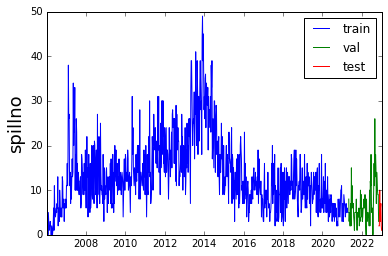

In [47]:
#plot the train,val,test split (weekly data)

plt.plot(data_train.index,data_train['spillno'])
plt.plot(data_val.index,data_val['spillno'])
plt.plot(data_test.index,data_test['spillno'])
plt.ylabel('spillno',fontsize=18)
plt.legend(['train','val','test'])
plt.show()


In [48]:
data_train

,spillno,month,year,quarter,week
incidentdate,,,,,
2006-01-08,4,1,2006,1,1
2006-01-15,2,1,2006,1,2
2006-01-22,3,1,2006,1,3
2006-01-29,0,1,2006,1,4
2006-02-05,5,2,2006,1,5
2006-02-12,3,2,2006,1,6
2006-02-19,1,2,2006,1,7
2006-02-26,2,2,2006,1,8
2006-03-05,2,3,2006,1,9


In [49]:
data_train.reset_index(inplace=True)
data_val.reset_index(inplace=True)
data_test.reset_index(inplace=True)

In [50]:
data_train.drop('incidentdate', axis=1, inplace=True)
data_val.drop('incidentdate',axis=1, inplace=True)
data_test.drop('incidentdate',axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
#Initialize h2o session
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_99zaza
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [52]:
# accessing H2OFlow UI
!npm install -g localtunnel -qq > /dev/null

In [53]:
get_ipython().system_raw('lt --port 54321 >> url.txt 2>&1 &')

In [54]:
#open the follwoing link to H2OFlow
!cat url.txt

In [55]:
#Convert pandas dataframes to h2o frames
hf_train = h2o.H2OFrame(data_train)
hf_val  = h2o.H2OFrame(data_val)
hf_test = h2o.H2OFrame(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [56]:
#Select response and features
y = 'spillno'
X = hf_train.columns
X.remove(y)

In [57]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20230214_95056_model_3


Status of Neuron Layers: predicting spillno, regression, gaussian distribution, Quadratic loss, 601 weights/biases, 11.3 KB, 487,390 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        4        Input             10.0
    2        100      RectifierDropout  0.0        0.0   0.0   0.0006896135238093848  0.001464826986193657    0.0         0.024736546791682485   0.2165887951850891   0.5330190240229518   0.134063720703125
    3        1        Linear                       0.0   0.0   8.641660895591485e-05  4.0183396777138114e-05  0.0         0.0009582367539405823  0.19610249996185303  0.13838262539655916  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 43.314282370209185
RMSE: 6.58135870244201
MAE: 5.178095746310192
RMSLE: 0.5095829292231298
Mean Residual Deviance: 43.314282370209185

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 43.01970095251105
RMSE: 6.558940535826731
MAE: 5.064043995559833
RMSLE: 0.5051017315329016
Mean Residual Deviance: 43.01970095251105

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     5.12947   0.420269   4.84776       5.12253       5.79405       4.70195       5.18104
mean_residual_deviance  43.6443   6.06687    38.8505       41.8045       53.3077       38.7463       45.5127
mse                     43.6443   6.06687    38.8505       41.8045       53.3077       38.7463       45.5127
r2                      0.308288  0.0677691  0.29414       0.320058      0.208277      0.396819      0.322143
residual_deviance       43.6443   6.06687    38.8505       41.8045       53.3077       38.7463       45.5127
rmse                    6.59417   0.44904    6.23302       6.46564       7.30121       6.22465       6.74631
rmsle                   0.509339  0.0321261  0.509484      0.520335      0.546423      0.458122      0.512333

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-02-14 09:57:53  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2023-02-14 09:57:53  5 min 16.768 sec  55486 obs/sec     10        1             7990       10.1794          103.621              8.2814          -0.63842
    2023-02-14 09:57:58  5 min 21.821 sec  55379 obs/sec     360       36            287640     6.59233          43.4588              5.19782         0.31284
    2023-02-14 09:58:03  5 min 26.954 sec  47223 obs/sec     610       61            487390     6.58136          43.3143              5.1781          0.315126

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
year        1                      1                    0.426932
month       0.503785               0.503785             0.215082
quarter     0.436438               0.436438             0.186329
week        0.402072               0.402072   

In [58]:
 #Check the leaderboard
## models are ranked by peformance on the test data since we specified a leadboard_frame

lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20230214_95056_model_3,3.11129,9.68011,2.43264,nan,9.68011
DeepLearning_1_AutoML_1_20230214_95056,3.2237,10.3922,2.90216,0.665569,10.3922
StackedEnsemble_BestOfFamily_4_AutoML_1_20230214_95056,3.30052,10.8934,2.94913,0.683901,10.8934
StackedEnsemble_BestOfFamily_6_AutoML_1_20230214_95056,3.34877,11.2143,2.97687,0.693799,11.2143
StackedEnsemble_BestOfFamily_5_AutoML_1_20230214_95056,3.39767,11.5442,2.96723,0.693165,11.5442
XGBoost_grid_1_AutoML_1_20230214_95056_model_20,3.43073,11.7699,2.97725,0.699521,11.7699
StackedEnsemble_AllModels_6_AutoML_1_20230214_95056,3.4906,12.1843,3.02473,0.700322,12.1843
GBM_grid_1_AutoML_1_20230214_95056_model_12,3.51354,12.345,3.10605,0.725664,12.345
XGBoost_grid_1_AutoML_1_20230214_95056_model_2,3.51772,12.3743,2.98031,0.679865,12.3743
DeepLearning_grid_3_AutoML_1_20230214_95056_model_1,3.53418,12.4904,3.08655,0.725702,12.4904


In [59]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_val)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20230214_100057_model_4


Model Summary: 
    number_of_trees
--  -----------------
    60

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 24.61384992143058
RMSE: 4.961234717429783
MAE: 3.7633507436745157
RMSLE: 0.37396058689548245
Mean Residual Deviance: 24.61384992143058

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 28.397898620405424
RMSE: 5.32896787571528
MAE: 4.049881890061799
RMSLE: 0.40417178344216953
Mean Residual Deviance: 28.397898620405424

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     4.04976   0.245436   3.95555       4.21972       4.37067       3.74765       3.95523
mean_residual_deviance  28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
mse                     28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
r2                      0.549425  0.0629912  0.541793      0.509011      0.477073      0.638756      0.580491
residual_deviance       28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
rmse                    5.31487   0.432663   5.02192       5.49429       5.93375       4.81716       5.30723
rmsle                   0.403912  0.0159663  0.396462      0.431191      0.403495      0.390239      0.398173

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-02-14 10:01:14  4.742 sec   0                  15.2785          13.0507         233.434
    2023-02-14 10:01:14  4.758 sec   5                  7.65811          5.30049         58.6466
    2023-02-14 10:01:14  4.762 sec   10                 6.34326          4.63135         40.237
    2023-02-14 10:01:14  4.778 sec   15                 6.09999          4.5748          37.2099
    2023-02-14 10:01:14  4.782 sec   20                 5.77557          4.34685         33.3572
    2023-02-14 10:01:14  4.787 sec   25                 5.48785          4.14793         30.1165
    2023-02-14 10:01:14  4.800 sec   30                 5.36394          4.07433         28.7719
    2023-02-14 10:01:14  4.812 sec   35                 5.24269          3.99501         27.4858
    2023-02-14 10:01:14  4.817 sec   40                 5.16138          3.92654         26.6399
    2023-02-14 10:01:14  4.828 sec   45                 5.11538          3.88152         26.1671
    2023-02-14 10:01:14  4.840 sec   50                 5.03852          3.82486         25.3867
    2023-02-14 10:01:14  4.846 sec   55                 4.99163          3.78543         24.9164
    2023-02-14 10:01:14  4.853 sec   60                 4.96123          3.76335         24.6138

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
year        40735.8                1                    0.917204
week        2426.62                0.0595698            0.0546377
month       1132.92                0.0278115            0.0255088
quarter     117.661                0.0028884            0.00264925

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [60]:
 #Check the leaderboard
## models are ranked by peformance on the test data since we specified a leadboard_frame

lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_2_20230214_100057_model_4,4.62283,21.3706,3.51095,0.648659,21.3706
XGBoost_grid_1_AutoML_2_20230214_100057_model_6,4.63715,21.5032,3.56567,0.652816,21.5032
XGBoost_2_AutoML_2_20230214_100057,4.66344,21.7477,3.30783,0.610091,21.7477
GBM_grid_1_AutoML_2_20230214_100057_model_61,4.67251,21.8324,3.44753,0.642192,21.8324
GBM_grid_1_AutoML_2_20230214_100057_model_56,4.67904,21.8934,3.40603,0.633842,21.8934
GBM_grid_1_AutoML_2_20230214_100057_model_4,4.67954,21.8981,3.44592,0.636876,21.8981
GBM_grid_1_AutoML_2_20230214_100057_model_5,4.69002,21.9963,3.33031,0.627794,21.9963
StackedEnsemble_BestOfFamily_7_AutoML_2_20230214_100057,4.69699,22.0617,3.37085,0.632335,22.0617
StackedEnsemble_AllModels_3_AutoML_2_20230214_100057,4.69738,22.0654,3.455,0.64195,22.0654
GBM_grid_1_AutoML_2_20230214_100057_model_10,4.70106,22.0999,3.49681,0.64377,22.0999


In [61]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_val)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20230214_101052_model_4


Model Summary: 
    number_of_trees
--  -----------------
    60

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 24.61384992143058
RMSE: 4.961234717429783
MAE: 3.7633507436745157
RMSLE: 0.37396058689548245
Mean Residual Deviance: 24.61384992143058

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 28.397898620405424
RMSE: 5.32896787571528
MAE: 4.049881890061799
RMSLE: 0.40417178344216953
Mean Residual Deviance: 28.397898620405424

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     4.04976   0.245436   3.95555       4.21972       4.37067       3.74765       3.95523
mean_residual_deviance  28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
mse                     28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
r2                      0.549425  0.0629912  0.541793      0.509011      0.477073      0.638756      0.580491
residual_deviance       28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
rmse                    5.31487   0.432663   5.02192       5.49429       5.93375       4.81716       5.30723
rmsle                   0.403912  0.0159663  0.396462      0.431191      0.403495      0.390239      0.398173

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-02-14 10:11:06  2.742 sec   0                  15.2785          13.0507         233.434
    2023-02-14 10:11:06  2.780 sec   5                  7.65811          5.30049         58.6466
    2023-02-14 10:11:07  2.793 sec   10                 6.34326          4.63135         40.237
    2023-02-14 10:11:07  2.808 sec   15                 6.09999          4.5748          37.2099
    2023-02-14 10:11:07  2.817 sec   20                 5.77557          4.34685         33.3572
    2023-02-14 10:11:07  2.823 sec   25                 5.48785          4.14793         30.1165
    2023-02-14 10:11:07  2.870 sec   30                 5.36394          4.07433         28.7719
    2023-02-14 10:11:07  2.881 sec   35                 5.24269          3.99501         27.4858
    2023-02-14 10:11:07  2.897 sec   40                 5.16138          3.92654         26.6399
    2023-02-14 10:11:07  2.908 sec   45                 5.11538          3.88152         26.1671
    2023-02-14 10:11:07  2.918 sec   50                 5.03852          3.82486         25.3867
    2023-02-14 10:11:07  2.927 sec   55                 4.99163          3.78543         24.9164
    2023-02-14 10:11:07  2.945 sec   60                 4.96123          3.76335         24.6138

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
year        40735.8                1                    0.917204
week        2426.62                0.0595698            0.0546377
month       1132.92                0.0278115            0.0255088
quarter     117.661                0.0028884            0.00264925

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_3_20230214_101052_model_4,4.62283,21.3706,3.51095,0.648659,21.3706,212,0.038643,XGBoost
XGBoost_grid_1_AutoML_3_20230214_101052_model_6,4.63715,21.5032,3.56567,0.652816,21.5032,119,0.008634,XGBoost
XGBoost_2_AutoML_3_20230214_101052,4.66344,21.7477,3.30783,0.610091,21.7477,224,0.008771,XGBoost
GBM_grid_1_AutoML_3_20230214_101052_model_56,4.67904,21.8934,3.40603,0.633842,21.8934,102,0.021663,GBM
GBM_grid_1_AutoML_3_20230214_101052_model_4,4.67954,21.8981,3.44592,0.636876,21.8981,91,0.021723,GBM
StackedEnsemble_BestOfFamily_6_AutoML_3_20230214_101052,4.68642,21.9625,3.35067,0.629967,21.9625,556,0.06626,StackedEnsemble
GBM_grid_1_AutoML_3_20230214_101052_model_5,4.69002,21.9963,3.33031,0.627794,21.9963,109,0.021812,GBM
StackedEnsemble_BestOfFamily_7_AutoML_3_20230214_101052,4.69614,22.0537,3.34885,0.627455,22.0537,131,0.071314,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_3_20230214_101052,4.69738,22.0654,3.455,0.64195,22.0654,313,0.730753,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_3_20230214_101052,4.69738,22.0654,3.455,0.64195,22.0654,315,0.342416,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

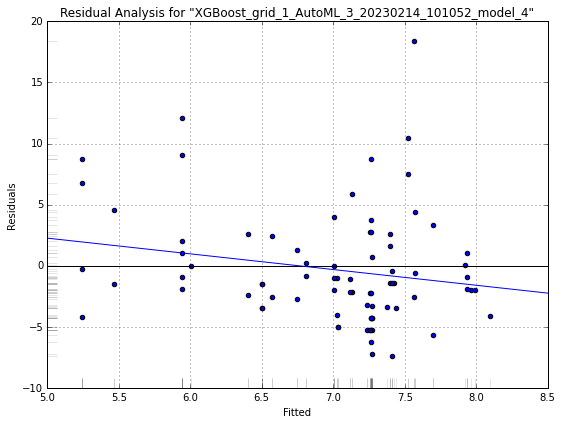

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

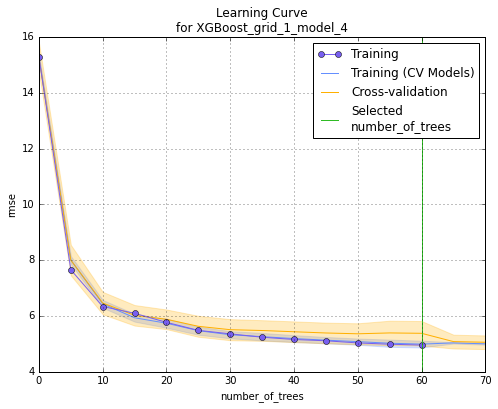

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

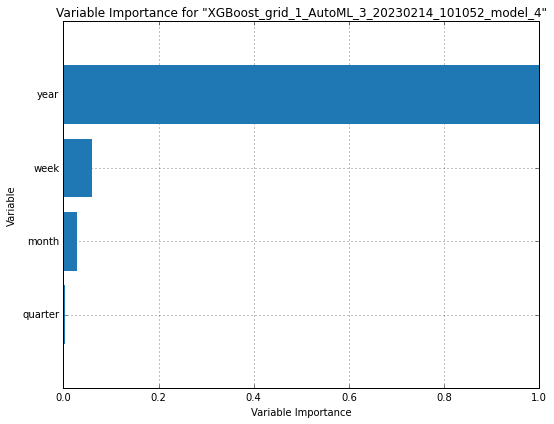

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

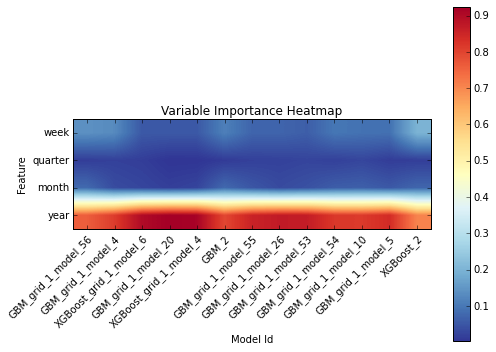

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

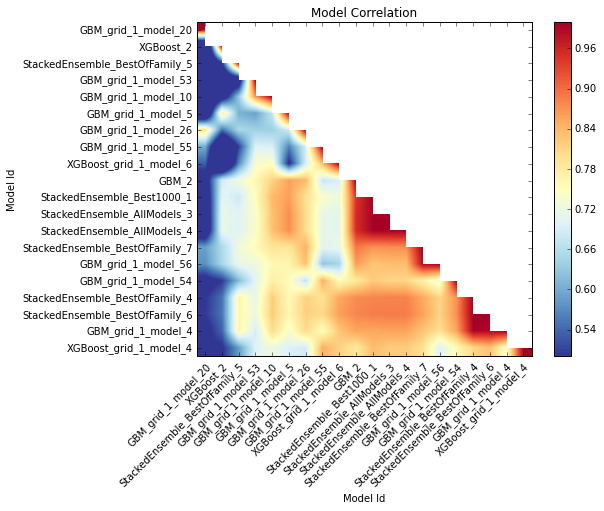

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

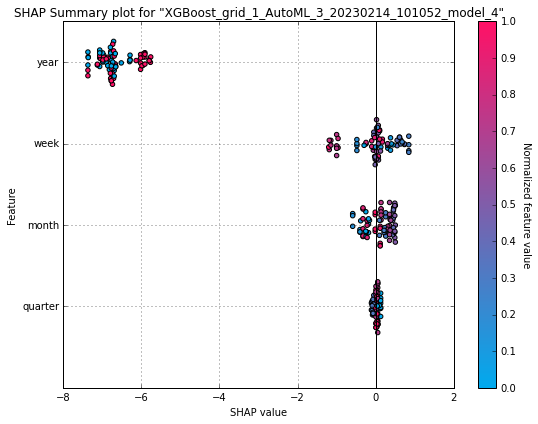

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

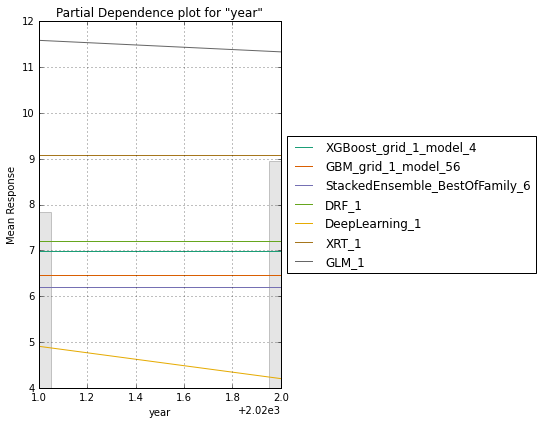

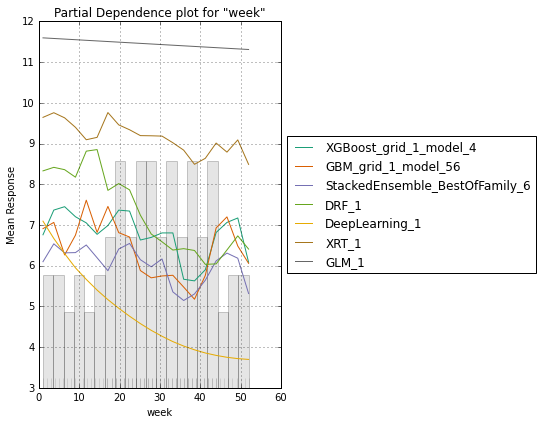

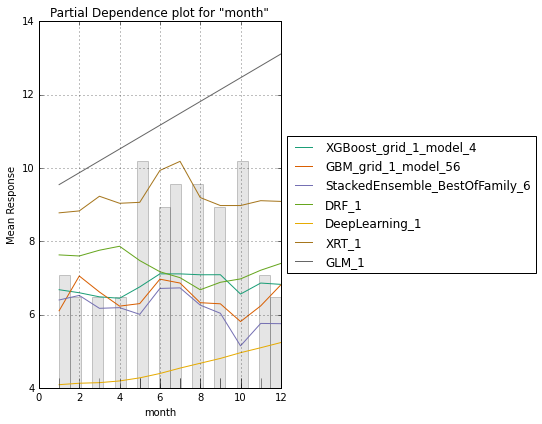

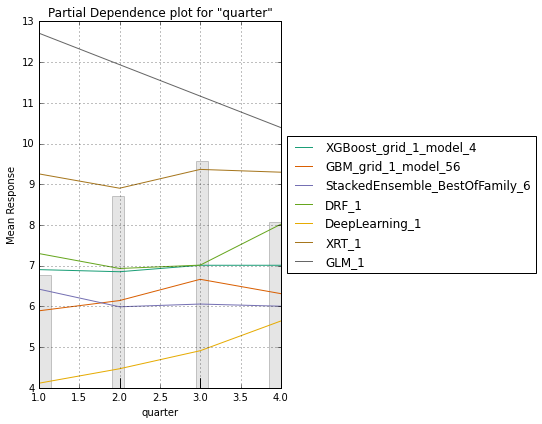

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

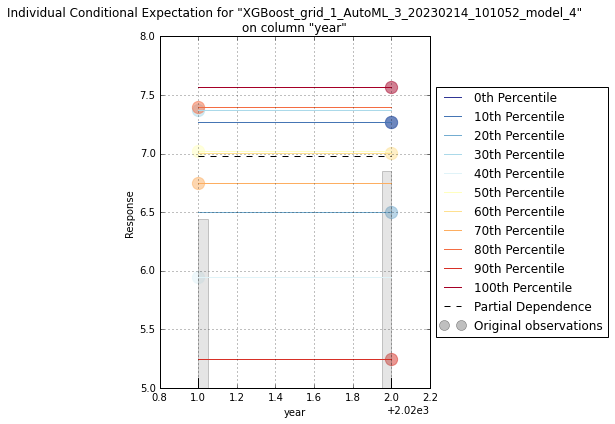

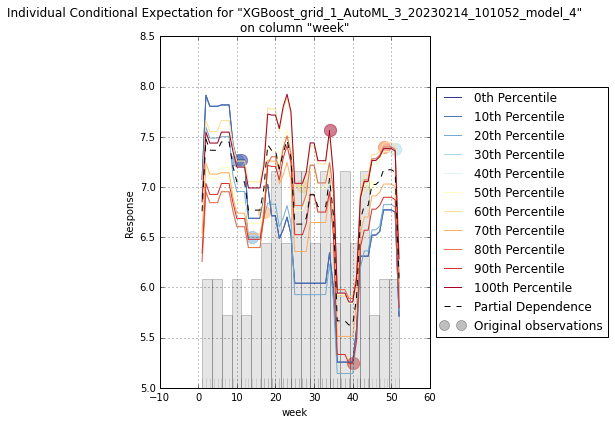

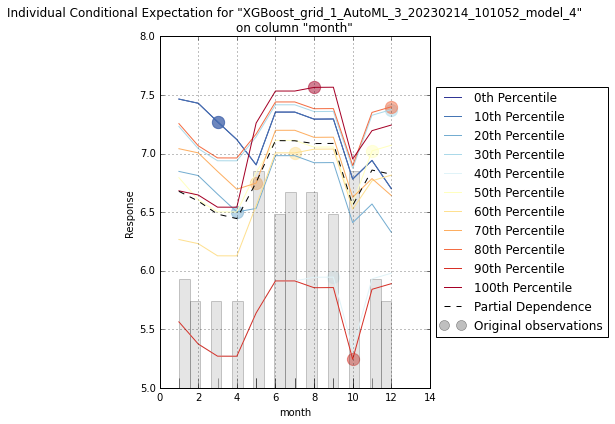

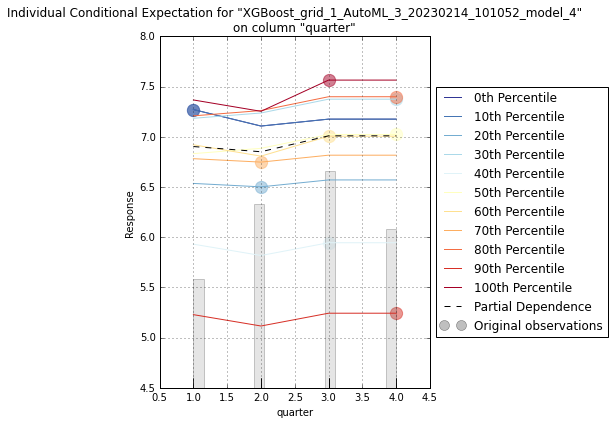

In [72]:
explain_model = aml.explain(frame = hf_val, figsize = (8,6))

In [ ]:
#Get the best XGBoost model using default sort

In [73]:
xgb = aml.get_best_model(algorithm="xgboost")

In [74]:
xgb

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20230214_101052_model_4


Model Summary: 
    number_of_trees
--  -----------------
    60

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 24.61384992143058
RMSE: 4.961234717429783
MAE: 3.7633507436745157
RMSLE: 0.37396058689548245
Mean Residual Deviance: 24.61384992143058

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 28.397898620405424
RMSE: 5.32896787571528
MAE: 4.049881890061799
RMSLE: 0.40417178344216953
Mean Residual Deviance: 28.397898620405424

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     4.04976   0.245436   3.95555       4.21972       4.37067       3.74765       3.95523
mean_residual_deviance  28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
mse                     28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
r2                      0.549425  0.0629912  0.541793      0.509011      0.477073      0.638756      0.580491
residual_deviance       28.3976   4.65611    25.2197       30.1872       35.2093       23.2051       28.1667
rmse                    5.31487   0.432663   5.02192       5.49429       5.93375       4.81716       5.30723
rmsle                   0.403912  0.0159663  0.396462      0.431191      0.403495      0.390239      0.398173

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-02-14 10:11:06  2.742 sec   0                  15.2785          13.0507         233.434
    2023-02-14 10:11:06  2.780 sec   5                  7.65811          5.30049         58.6466
    2023-02-14 10:11:07  2.793 sec   10                 6.34326          4.63135         40.237
    2023-02-14 10:11:07  2.808 sec   15                 6.09999          4.5748          37.2099
    2023-02-14 10:11:07  2.817 sec   20                 5.77557          4.34685         33.3572
    2023-02-14 10:11:07  2.823 sec   25                 5.48785          4.14793         30.1165
    2023-02-14 10:11:07  2.870 sec   30                 5.36394          4.07433         28.7719
    2023-02-14 10:11:07  2.881 sec   35                 5.24269          3.99501         27.4858
    2023-02-14 10:11:07  2.897 sec   40                 5.16138          3.92654         26.6399
    2023-02-14 10:11:07  2.908 sec   45                 5.11538          3.88152         26.1671
    2023-02-14 10:11:07  2.918 sec   50                 5.03852          3.82486         25.3867
    2023-02-14 10:11:07  2.927 sec   55                 4.99163          3.78543         24.9164
    2023-02-14 10:11:07  2.945 sec   60                 4.96123          3.76335         24.6138

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
year        40735.8                1                    0.917204
week        2426.62                0.0595698            0.0546377
month       1132.92                0.0278115            0.0255088
quarter     117.661                0.0028884            0.00264925

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [75]:
xgb.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'distribution', 'tweedie_power', 'categorical_encoding', 'quiet_mode', 'checkpoint', 'export_checkpoints_dir', 'ntrees', 'max_depth', 'min_rows', 'min_child_weight', 'learn_rate', 'eta', 'sample_rate', 'subsample', 'col_sample_rate', 'colsample_bylevel', 'col_sample_rate_per_tree', 'colsample_bytree', 'colsample_bynode', 'max_abs_leafnode_pred', 'max_delta_step', 'monotone_constraints', 'interaction_constraints', 'score_tree_interval', 'min_split_improvement', 'gamma', 'nthread', 'save_matrix_directory', 'build_tree_one_node', 'parallelize_cross_validation', 'calibrate_mod

**FLAML**

In [62]:
pip install "flaml[ts_forecast]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.8/786.8 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 7.3 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.19
    Uninstalling holidays-0.19:
      Successfully uninstalled holidays-0.19
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling light

In [63]:
from flaml import AutoML

In [64]:
# initialize AutoML instance
automl = AutoML()

In [65]:
# configure AutoML settings
settings = {
    "time_budget": 100,  # total running time in seconds
    "metric": "rmse",  # primary metric
    "task": "ts_forecast",  # task type
    "log_file_name": "oil_spill.log",  # flaml log file
    "eval_method": "holdout",
    "log_type": "all"
}


In [66]:
#Split into train, validation and test for the weekly dataset

x_train = df4wi.iloc[0 : 799]
x_val = df4wi.iloc[799 : 879]
x_test = df4wi.iloc[879 : ]


In [67]:
x_train = x_train.reset_index()

In [68]:
'''The main flaml automl API'''
automl.fit(dataframe=x_train,  # training data
           label='spillno',  # label column
           period=8,  # key word argument 'period' must be included for forecast task)
           **settings)

[flaml.automl.automl: 02-14 10:21:02] {2716} INFO - task = ts_forecast
[flaml.automl.automl: 02-14 10:21:02] {2718} INFO - Data split method: time
[flaml.automl.automl: 02-14 10:21:02] {2721} INFO - Evaluation method: holdout
[flaml.automl.automl: 02-14 10:21:02] {2848} INFO - Minimizing error metric: rmse
[flaml.automl.automl: 02-14 10:21:02] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'prophet', 'arima', 'sarimax']
[flaml.automl.automl: 02-14 10:21:02] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-14 10:21:02] {3461} INFO - Estimated sufficient time budget=2144s. Estimated necessary time budget=2s.
[flaml.automl.automl: 02-14 10:21:02] {3508} INFO -  at 0.6s,	estimator lgbm's best error=6.7100,	best estimator lgbm's best error=6.7100
[flaml.automl.automl: 02-14 10:21:02] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-14 10:21:02] {3508} INFO -  at 0.6s,	estimator lgbm's

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/bazwl4fi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/8za9ezut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47058', 'data', 'file=/tmp/tmp79ll_8is/bazwl4fi.json', 'init=/tmp/tmp79ll_8is/8za9ezut.json', 'output', 'file=/tmp/tmpqymqvwg3/prophet_model-20230214102105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[flaml.automl.automl: 02-14 10:21:08] {3508} INFO -  at 6.1s,	estimator prophet's best error=0.6872,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:08] {3323} INFO - iteration 50, current learner arima
[flaml.automl.automl: 02-14 10:21:11] {3508} INFO -  at 9.3s,	estimator arima's best error=1.1075,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:11] {3323} INFO - iteration 51, current learner sarimax
[flaml.automl.automl: 02-14 10:21:35] {3508} INFO -  at 33.2s,	estimator sarimax's best error=2.1587,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:35] {3323} INFO - iteration 52, current learner rf
[flaml.automl.automl: 02-14 10:21:35] {3508} INFO -  at 33.3s,	estimator rf's best error=2.4302,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:35] {3323} INFO - iteration 53, current learner extra_tree
[flaml.automl.automl: 02-14 10:21:35] {3508} INFO -  at 33.5s,	estimator 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/xm5xppvm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/n4nsprk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72106', 'data', 'file=/tmp/tmp79ll_8is/xm5xppvm.json', 'init=/tmp/tmp79ll_8is/n4nsprk0.json', 'output', 'file=/tmp/tmptlqre4kc/prophet_model-20230214102148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[flaml.automl.automl: 02-14 10:21:50] {3508} INFO -  at 47.9s,	estimator prophet's best error=0.6872,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:50] {3323} INFO - iteration 82, current learner xgboost
[flaml.automl.automl: 02-14 10:21:50] {3508} INFO -  at 48.0s,	estimator xgboost's best error=0.8136,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:50] {3323} INFO - iteration 83, current learner xgboost
[flaml.automl.automl: 02-14 10:21:50] {3508} INFO -  at 48.0s,	estimator xgboost's best error=0.8136,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:50] {3323} INFO - iteration 84, current learner arima
[flaml.automl.automl: 02-14 10:21:54] {3508} INFO -  at 51.9s,	estimator arima's best error=0.8075,	best estimator prophet's best error=0.6872
[flaml.automl.automl: 02-14 10:21:54] {3323} INFO - iteration 85, current learner xgboost
[flaml.automl.automl: 02-14 10:21:54] {3508} INFO -  at 51.9s,	e

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/kvrsgpj3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/x23jzfbf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91678', 'data', 'file=/tmp/tmp79ll_8is/kvrsgpj3.json', 'init=/tmp/tmp79ll_8is/x23jzfbf.json', 'output', 'file=/tmp/tmpwuj1ki5e/prophet_model-20230214102154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[flaml.automl.automl: 02-14 10:21:56] {3508} INFO -  at 54.3s,	estimator prophet's best error=0.6863,	best estimator prophet's best error=0.6863
[flaml.automl.automl: 02-14 10:21:56] {3323} INFO - iteration 87, current learner xgb_limitdepth
[flaml.automl.automl: 02-14 10:21:56] {3508} INFO -  at 54.3s,	estimator xgb_limitdepth's best error=0.7113,	best estimator prophet's best error=0.6863
[flaml.automl.automl: 02-14 10:21:56] {3323} INFO - iteration 88, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/xt98mxcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79ll_8is/izj0ib7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12185', 'data', 'file=/tmp/tmp79ll_8is/xt98mxcl.json', 'init=/tmp/tmp79ll_8is/izj0ib7e.json', 'output', 'file=/tmp/tmplgqtzo6g/prophet_model-20230214102156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[flaml.automl.automl: 02-14 10:21:58] {3508} INFO -  at 56.2s,	estimator prophet's best error=0.6863,	best estimator prophet's best error=0.6863
[flaml.automl.automl: 02-14 10:21:58] {3323} INFO - iteration 89, current learner xgb_limitdepth
[flaml.automl.automl: 02-14 10:21:58] {3508} INFO -  at 56.2s,	estimator xgb_limitdepth's best error=0.7113,	best estimator prophet's best error=0.6863
[flaml.automl.automl: 02-14 10:21:58] {3323} INFO - iteration 90, current learner xgb_limitdepth
[flaml.automl.automl: 02-14 10:21:58] {3508} INFO -  at 56.2s,	estimator xgb_limitdepth's best error=0.7113,	best estimator prophet's best error=0.6863
[flaml.automl.automl: 02-14 10:21:58] {3323} INFO - iteration 91, current learner xgboost
[flaml.automl.automl: 02-14 10:21:58] {3508} INFO -  at 56.3s,	estimator xgboost's best error=0.8136,	best estimator prophet's best error=0.6863
[flaml.automl.automl: 02-14 10:21:58] {3323} INFO - iteration 92, current learner xgboost
[flaml.automl.automl: 02-14 10:2